In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import matplotlib
import os

In [16]:
os.chdir('C:\\Users\\kirti\\Downloads')

#### 1.	Read the data as an appropriate Time Series data and plot the data.

In [17]:
dr = pd.read_csv('Rose_1.csv',parse_dates=True,index_col='YearMonth')
dr.head()
dr.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [18]:
dr = dr.rename(columns={"YearMonth": "Year-Month"})

In [19]:
dr = dr.rename(columns={"Rose": "Rose Monthly Sales"})
dr.head()

,Rose Monthly Sales
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [20]:
dr.shape

(187, 1)

In [21]:
dr.isnull().sum()


Rose Monthly Sales    2
dtype: int64

In [22]:
print(dr['1994'])

            Rose Monthly Sales
YearMonth                     
1994-01-01                30.0
1994-02-01                35.0
1994-03-01                42.0
1994-04-01                48.0
1994-05-01                44.0
1994-06-01                45.0
1994-07-01                 NaN
1994-08-01                 NaN
1994-09-01                46.0
1994-10-01                51.0
1994-11-01                63.0
1994-12-01                84.0


#### Treatment of Missing Values

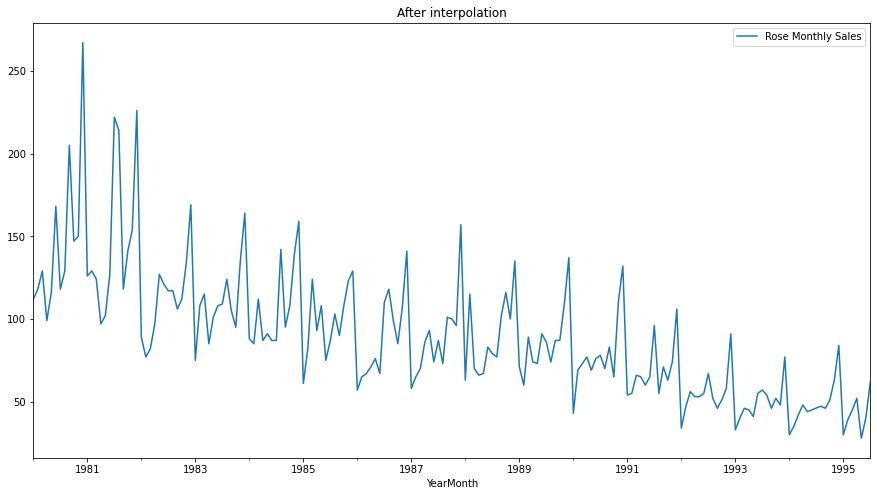

In [23]:
dr2= dr.interpolate(method = 'spline', order=1)
dr2.plot()
plt.title('After interpolation')
plt.show()

In [24]:
print('Imputed value')
print(dr2['1994'])

print('Original value')
print(dr['1994'])

Imputed value
            Rose Monthly Sales
YearMonth                     
1994-01-01           30.000000
1994-02-01           35.000000
1994-03-01           42.000000
1994-04-01           48.000000
1994-05-01           44.000000
1994-06-01           45.000000
1994-07-01           46.153199
1994-08-01           47.211982
1994-09-01           46.000000
1994-10-01           51.000000
1994-11-01           63.000000
1994-12-01           84.000000
Original value
            Rose Monthly Sales
YearMonth                     
1994-01-01                30.0
1994-02-01                35.0
1994-03-01                42.0
1994-04-01                48.0
1994-05-01                44.0
1994-06-01                45.0
1994-07-01                 NaN
1994-08-01                 NaN
1994-09-01                46.0
1994-10-01                51.0
1994-11-01                63.0
1994-12-01                84.0


In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

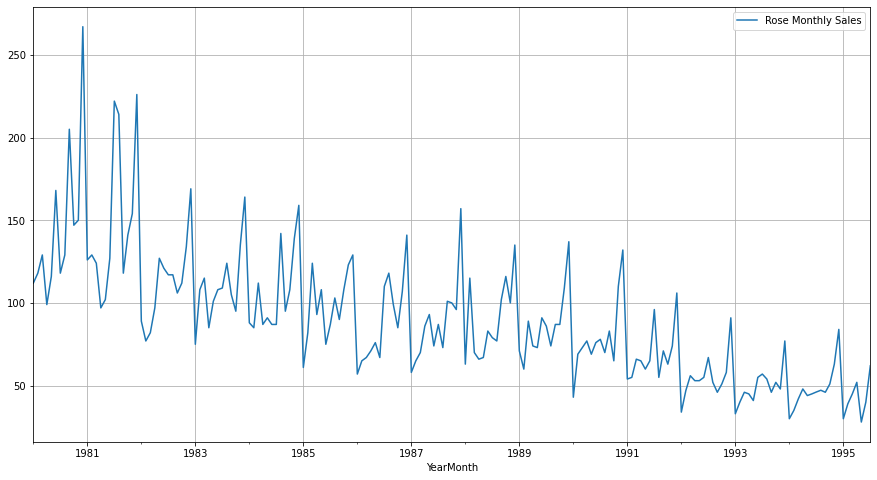

In [26]:
dr2.plot()
plt.grid();

#### 2. Perform Exploratory Data Analysis and Decomposition.

In [27]:
dr2.describe()

,Rose Monthly Sales
count,187.000000
mean,89.927087
std,39.224153
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [28]:
dr2.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rose Monthly Sales  187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


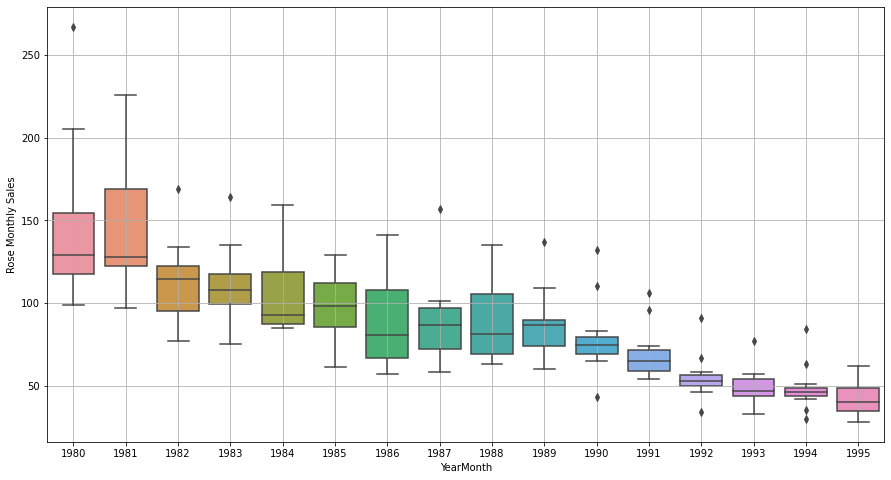

In [29]:
sns.boxplot(x = dr2.index.year,y = dr2['Rose Monthly Sales'])
plt.grid();

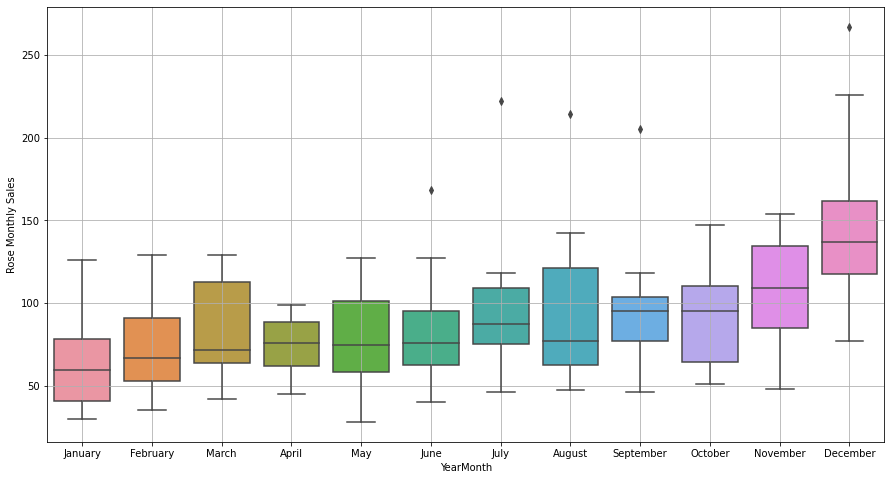

In [30]:
sns.boxplot(x = dr2.index.month_name(),y = dr2['Rose Monthly Sales'])
plt.grid();

In [31]:
from statsmodels.graphics.tsaplots import month_plot

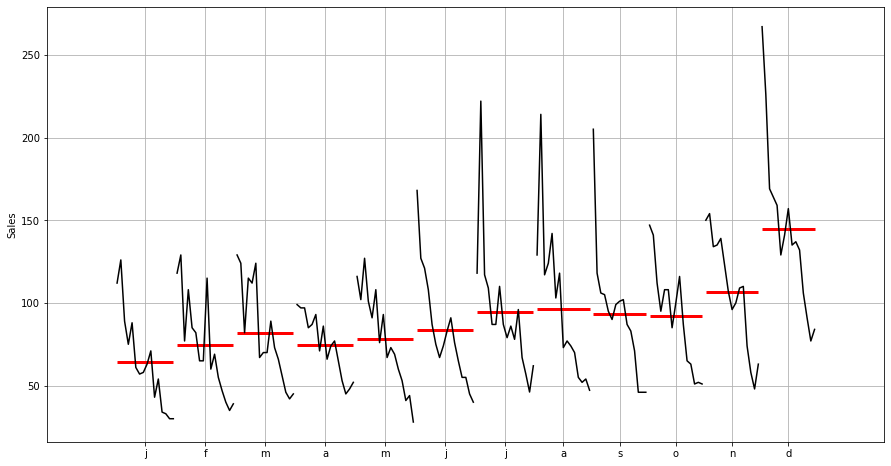

In [32]:
month_plot(dr2['Rose Monthly Sales'],ylabel='Sales')
plt.grid();

In [33]:
monthly_sales_across_years2 = pd.pivot_table(dr2, values = 'Rose Monthly Sales', columns = dr2.index.month, index = dr2.index.year)
monthly_sales_across_years2

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


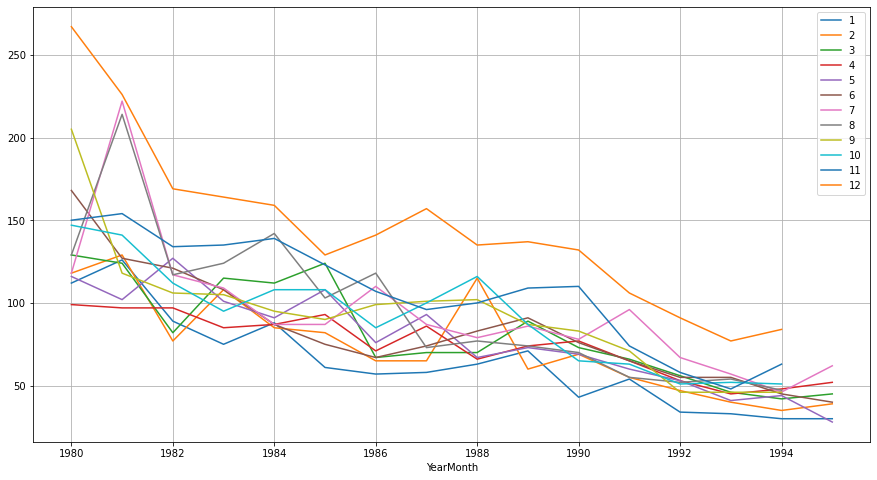

In [34]:
monthly_sales_across_years2.plot()
plt.grid()
plt.legend(loc='best');

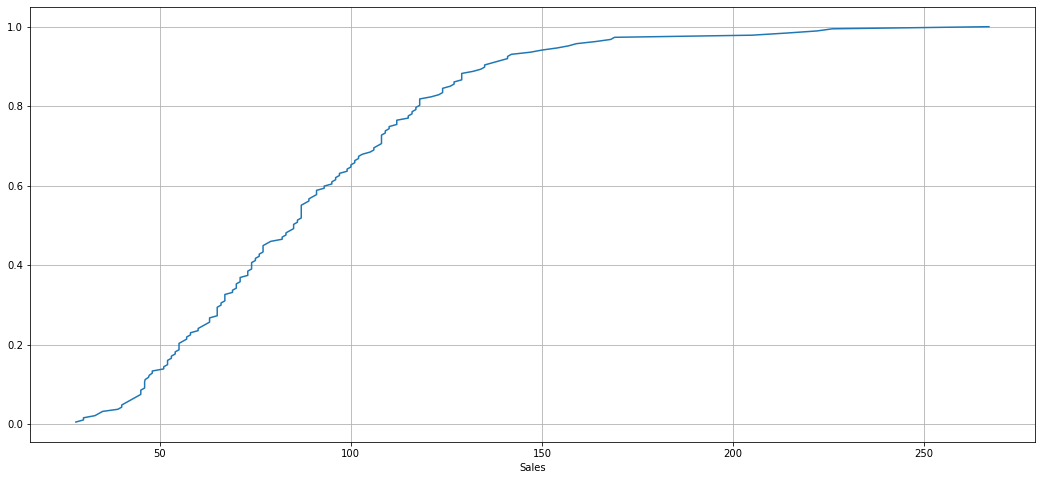

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(dr2['Rose Monthly Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Rose Sales per month and the month on month percentage change of Rose Wine Sales

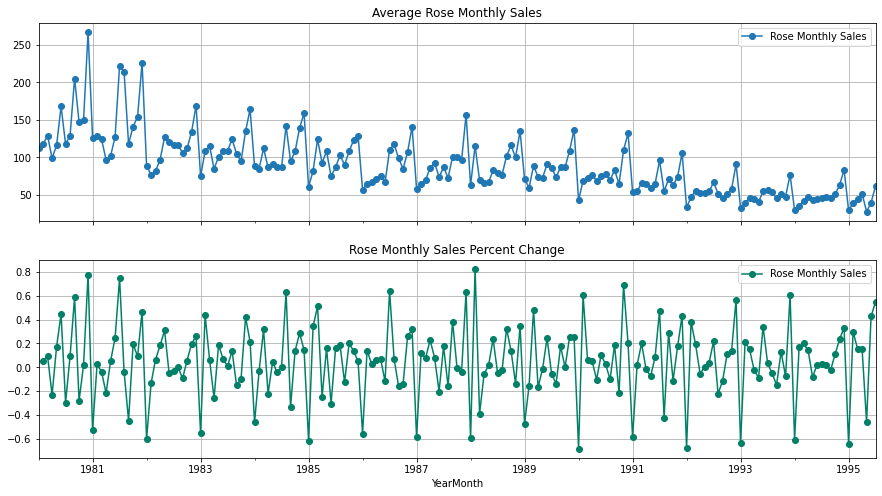

In [36]:
average    = dr2.groupby(dr2.index)["Rose Monthly Sales"].mean()
pct_change = dr2.groupby(dr2.index)["Rose Monthly Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Monthly Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Monthly Sales Percent Change",grid=True)

#### Decompose the Time Series and plot the different components

In [37]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### Additive Decomposition

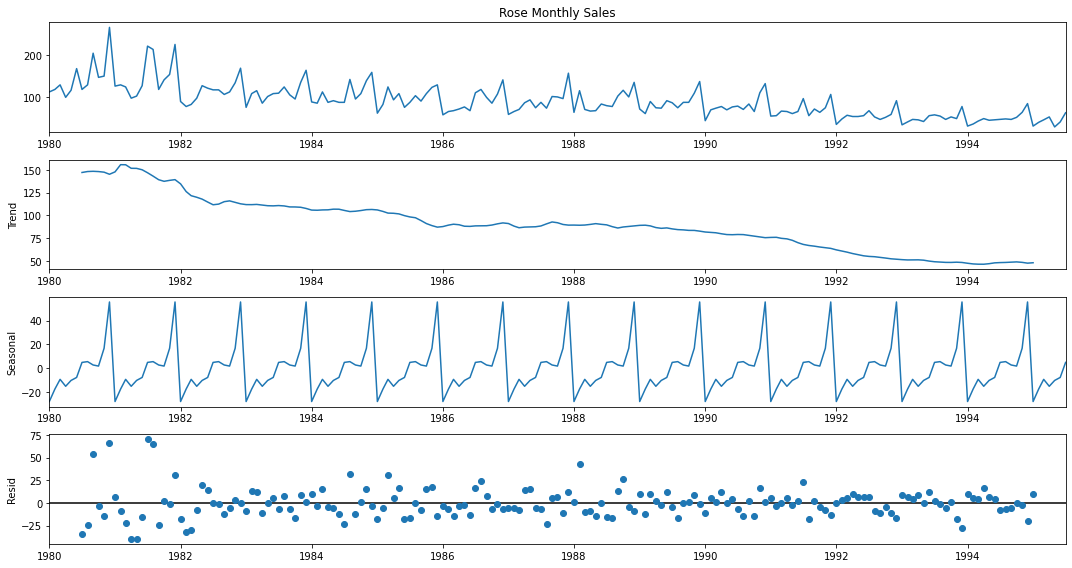

In [38]:
decomposition = seasonal_decompose(dr2['Rose Monthly Sales'],model='additive')
decomposition.plot();

In [39]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.921780
1980-02-01   -17.445103
1980-03-01    -9.299901
1980-04-01   -15.112401
1980-05-01   -10.210615
1980-06-01    -7.692758
1980-07-01     4.938434
1980-08-01     5.589575
1980-09-01     2.761554
1980-10-01     1.858776
1980-11-01    16.833776
1980-12-01    55.700443
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.021767
1980-08-01   -24.714575
1980-09-01    53.863446
1980-10-01    -2.942109
1980-11-01   -14.250443
1980-12-01    66.17455

#### Multiplicative Model

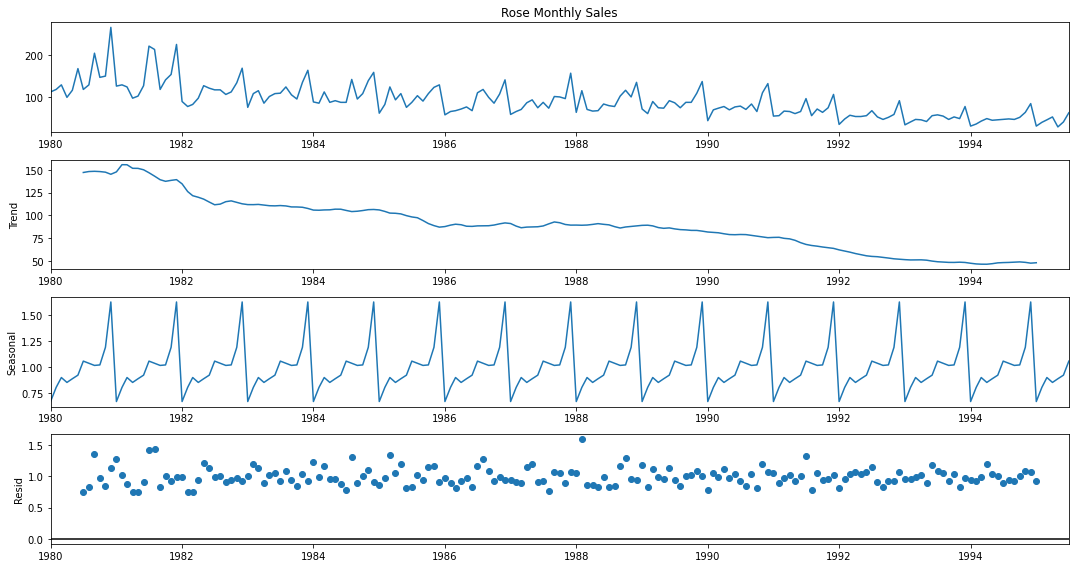

In [40]:
decomposition = seasonal_decompose(dr2['Rose Monthly Sales'],model='multiplicative')
decomposition.plot();

In [41]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.669946
1980-02-01    0.806019
1980-03-01    0.900899
1980-04-01    0.853719
1980-05-01    0.889143
1980-06-01    0.923718
1980-07-01    1.058920
1980-08-01    1.037754
1980-09-01    1.017402
1980-10-01    1.022303
1980-11-01    1.192007
1980-12-01    1.628173
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.757627
1980-08-01    0.839203
1980-09-01    1.358003
1980-10-01    0.971028
1980-11-01    0.853623
1980-12-01    1.129974
Name: resid, dtype: fl

#### 3. Split the data into training and test. The test data should start in 1991.

In [42]:
train=dr2[dr2.index.year < 1991]
test=dr2[dr2.index.year >= 1991]

In [43]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


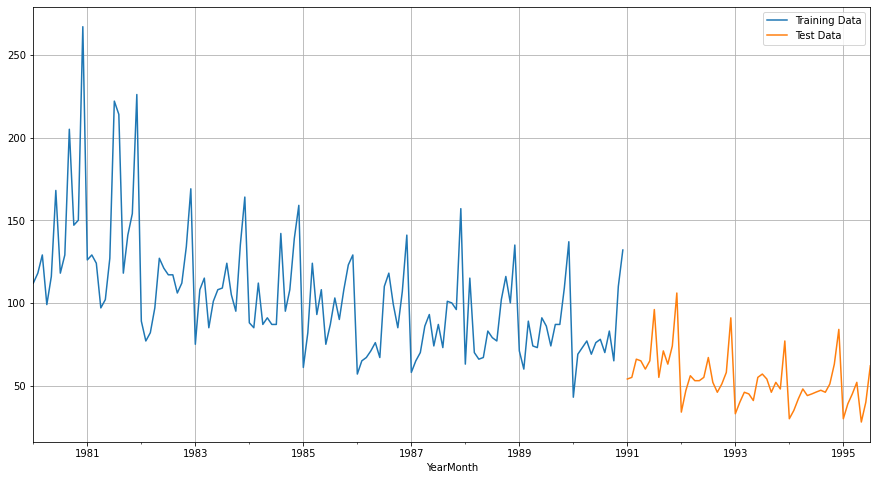

In [44]:
train['Rose Monthly Sales'].plot()
test['Rose Monthly Sales'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Model 1: Linear Regression

In [45]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [46]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [47]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Rose Monthly Sales  time
YearMonth                           
1980-01-01               112.0     1
1980-02-01               118.0     2
1980-03-01               129.0     3
1980-04-01                99.0     4
1980-05-01               116.0     5 

Last few rows of Training Data 
             Rose Monthly Sales  time
YearMonth                           
1990-08-01                70.0   128
1990-09-01                83.0   129
1990-10-01                65.0   130
1990-11-01               110.0   131
1990-12-01               132.0   132 

First few rows of Test Data 
             Rose Monthly Sales  time
YearMonth                           
1991-01-01                54.0   133
1991-02-01                55.0   134
1991-03-01                66.0   135
1991-04-01                65.0   136
1991-05-01                60.0   137 

Last few rows of Test Data 
             Rose Monthly Sales  time
YearMonth                           
1995-03-01       

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose Monthly Sales'].values)

LinearRegression()

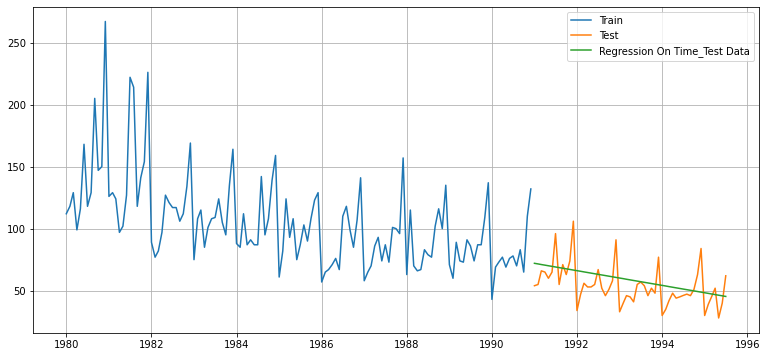

In [51]:
model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] =model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose Monthly Sales'], label='Train')
plt.plot(test['Rose Monthly Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [52]:
rmse_model1_test = metrics.mean_squared_error(test['Rose Monthly Sales'],model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.255


In [53]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.255492


### Model 2: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡

In [54]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [55]:
NaiveModel_test['naive'] = np.asarray(train['Rose Monthly Sales'])[len(np.asarray(train['Rose Monthly Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

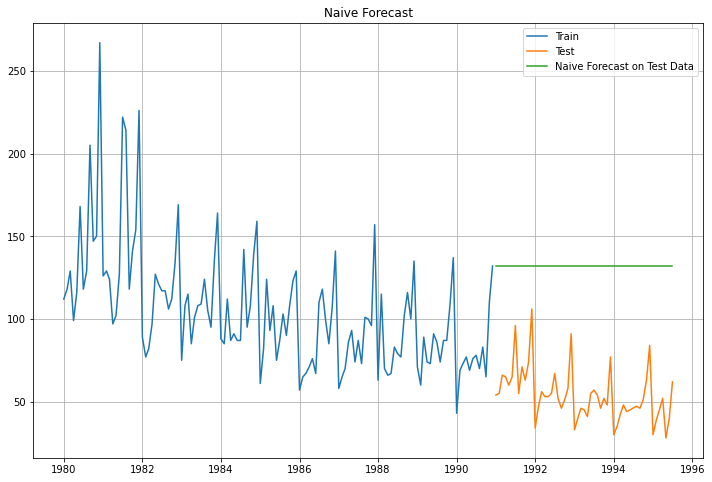

In [56]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose Monthly Sales'], label='Train')
plt.plot(test['Rose Monthly Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [57]:
rmse_model2_test = metrics.mean_squared_error(test['Rose Monthly Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive Approach forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Approach forecast on the Test Data,  RMSE is 79.672


In [58]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475


### Model 3: Simple Average

In [59]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [60]:
SimpleAverage_test['mean_forecast'] = train['Rose Monthly Sales'].mean()
SimpleAverage_test.head()

,Rose Monthly Sales,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


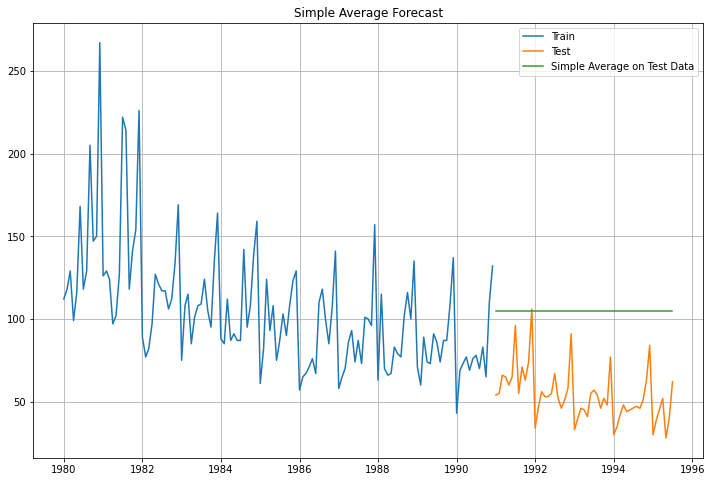

In [61]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose Monthly Sales'], label='Train')
plt.plot(SimpleAverage_test['Rose Monthly Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [62]:
rmse_model3_test = metrics.mean_squared_error(test['Rose Monthly Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.413


In [63]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298


### Model 4: Moving Average

In [64]:
MovingAverage = dr2.copy()
MovingAverage.head()

,Rose Monthly Sales
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


#### Trailing Moving Averages

In [65]:
MovingAverage['Trailing_2'] = MovingAverage['Rose Monthly Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose Monthly Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose Monthly Sales'].rolling(6).mean()


MovingAverage.head()

,Rose Monthly Sales,Trailing_2,Trailing_4,Trailing_6
YearMonth,,,,
1980-01-01,112.0,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN
1980-05-01,116.0,107.5,115.5,NaN


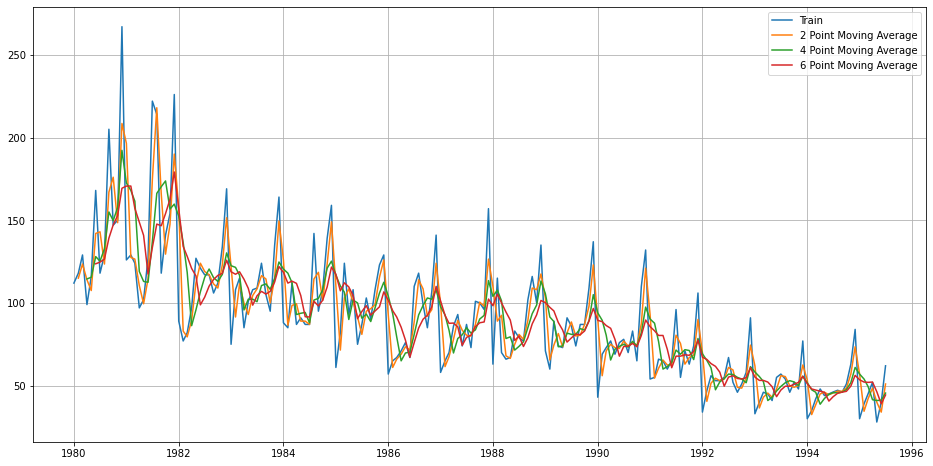

In [66]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose Monthly Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [67]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

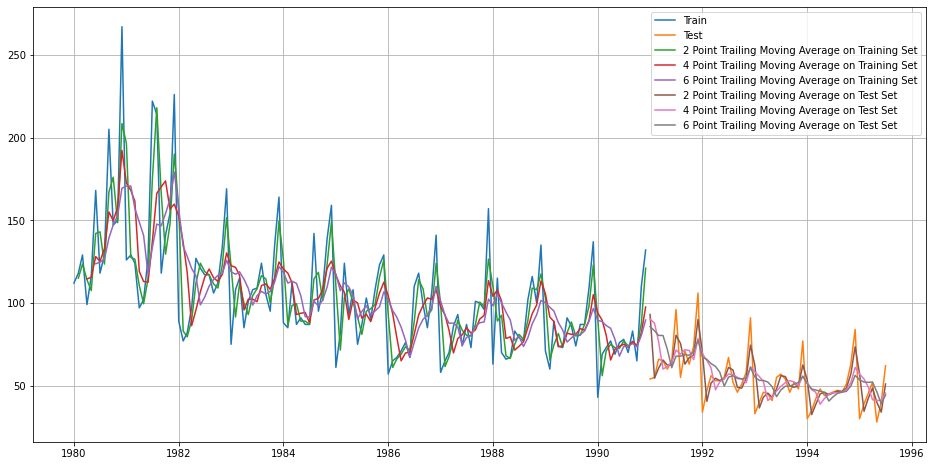

In [68]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose Monthly Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose Monthly Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation on Test Data

In [149]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose Monthly Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose Monthly Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose Monthly Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))


For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.555


In [70]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986


### Model 5: Simple Exponential Smoothing

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
model_SES = SimpleExpSmoothing(SES_train['Rose Monthly Sales'])

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose Monthly Sales,predict
YearMonth,,
1991-01-01,54.0,87.104999
1991-02-01,55.0,87.104999
1991-03-01,66.0,87.104999
1991-04-01,65.0,87.104999
1991-05-01,60.0,87.104999


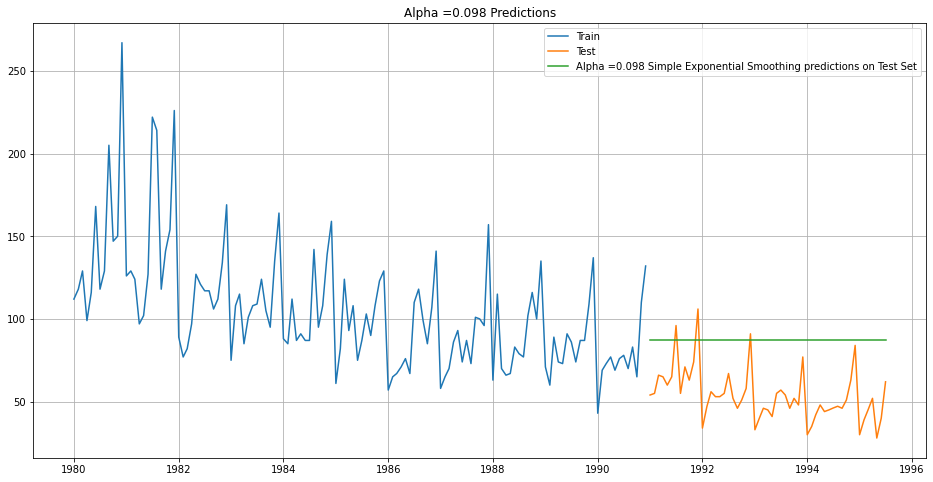

In [77]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose Monthly Sales'], label='Train')
plt.plot(SES_test['Rose Monthly Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

In [78]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose Monthly Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.748


In [79]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404


### Model 6: Double Exponential Smoothing (Holt's Model)

In [80]:
DES_train = train.copy()
DES_test = test.copy()

In [81]:
model_DES = Holt(DES_train['Rose Monthly Sales'])

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [82]:
model_DES = model_DES.fit()
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 4.702648560991584e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81556799175306, 'initial_trend': -0.4943779411795828, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [83]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.063302
1991-02-01    71.568924
1991-03-01    71.074546
1991-04-01    70.580168
1991-05-01    70.085790
1991-06-01    69.591412
1991-07-01    69.097034
1991-08-01    68.602656
1991-09-01    68.108278
1991-10-01    67.613900
1991-11-01    67.119522
1991-12-01    66.625144
1992-01-01    66.130767
1992-02-01    65.636389
1992-03-01    65.142011
1992-04-01    64.647633
1992-05-01    64.153255
1992-06-01    63.658877
1992-07-01    63.164499
1992-08-01    62.670121
1992-09-01    62.175743
1992-10-01    61.681365
1992-11-01    61.186987
1992-12-01    60.692609
1993-01-01    60.198231
1993-02-01    59.703853
1993-03-01    59.209475
1993-04-01    58.715097
1993-05-01    58.220719
1993-06-01    57.726342
1993-07-01    57.231964
1993-08-01    56.737586
1993-09-01    56.243208
1993-10-01    55.748830
1993-11-01    55.254452
1993-12-01    54.760074
1994-01-01    54.265696
1994-02-01    53.771318
1994-03-01    53.276940
1994-04-01    52.782562
1994-05-01    52.288184
1994-06-01    51

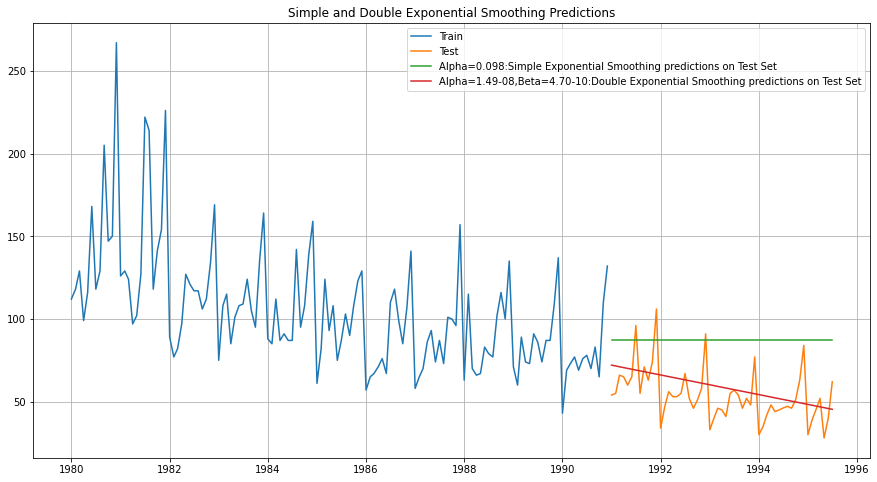

In [84]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49-08,Beta=4.70-10:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [85]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.25550225074557


In [86]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.49-08,Beta=4.70-10:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502


#### Double Exponential Smoothing Model - Tunned

In [87]:
model_DES1= Holt(DES_train['Rose Monthly Sales']).fit(smoothing_level=0.01,smoothing_trend=0.01)

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [88]:
DES_train['predict_i'] = model_DES1.fittedvalues
DES_test['predict_j'] = model_DES1.forecast(len(test))

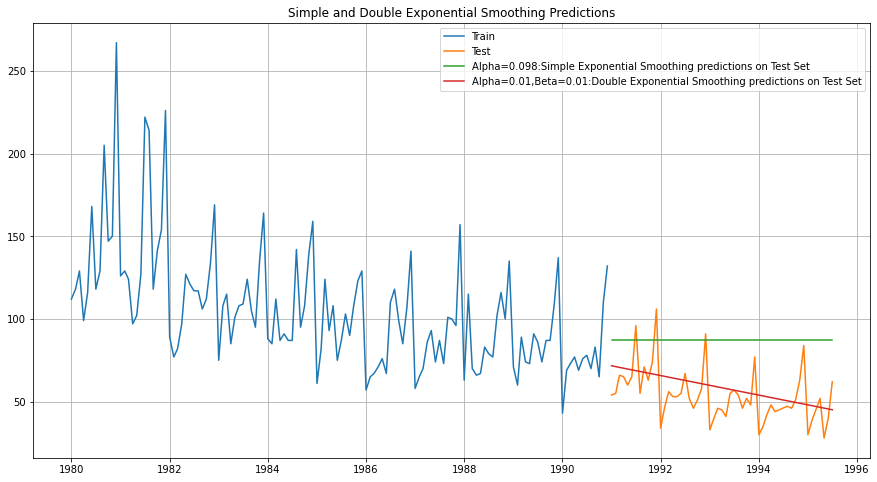

In [150]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict_j'], label='Alpha=0.01,Beta=0.01:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [90]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_test['predict_j'].values,squared=False))

DES RMSE: 15.15182681967136


In [91]:
resultsDf_model6_1 = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_test['predict_j'].values,squared=False)]}
                           ,index=['Alpha=0.01,Beta=0.01:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_model6_1])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"Alpha=0.01,Beta=0.01:DES",15.151827


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [92]:
TES_train = train.copy()
TES_test = test.copy()

In [93]:
model_TES = ExponentialSmoothing(TES_train['Rose Monthly Sales'],trend='additive',seasonal='multiplicative')

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [94]:
model_TES_autofit = model_TES.fit()

In [95]:
model_TES_autofit.params

{'smoothing_level': 0.06475408609774214,
 'smoothing_trend': 0.05307002085376367,
 'smoothing_seasonal': 3.0517776640274286e-08,
 'damping_trend': nan,
 'initial_level': 61.109156896449434,
 'initial_trend': -0.3800333306252026,
 'initial_seasons': array([1.84498345, 2.09357803, 2.2872201 , 1.99940217, 2.24762785,
        2.45077751, 2.6939182 , 2.86477256, 2.71790667, 2.65917328,
        3.0997045 , 4.27511796]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose Monthly Sales,auto_predict
YearMonth,,
1991-01-01,54.0,56.749570
1991-02-01,55.0,64.204151
1991-03-01,66.0,69.932954
1991-04-01,65.0,60.949499
1991-05-01,60.0,68.310351


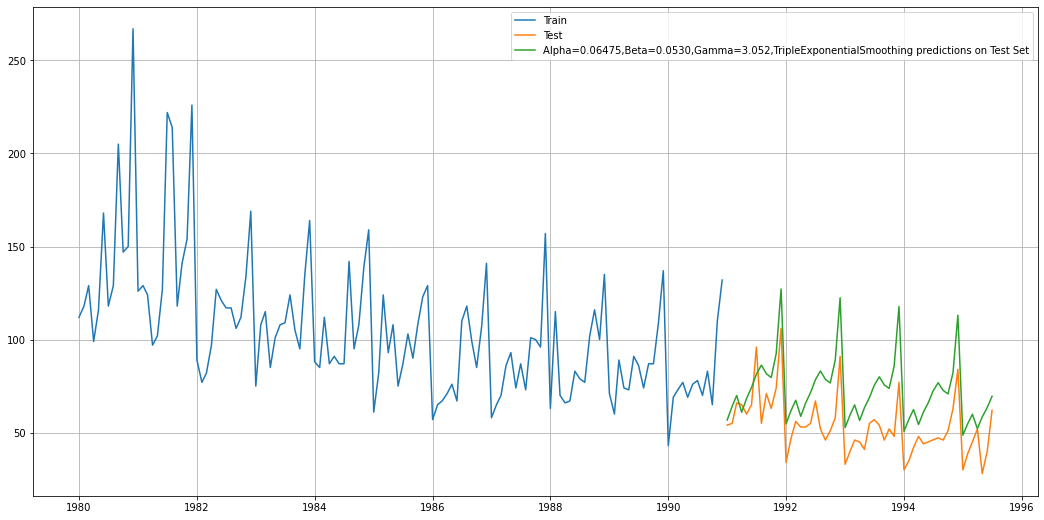

In [97]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose Monthly Sales'], label='Train')
plt.plot(TES_test['Rose Monthly Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
rmse_model7 = metrics.mean_squared_error(TES_test['Rose Monthly Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.06475,Beta=0.0530,Gamma=3.052, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7))

For Alpha=0.06475,Beta=0.0530,Gamma=3.052, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.084


In [99]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7]}
                           ,index=['Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"Alpha=0.01,Beta=0.01:DES",15.151827
"Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing",21.084366


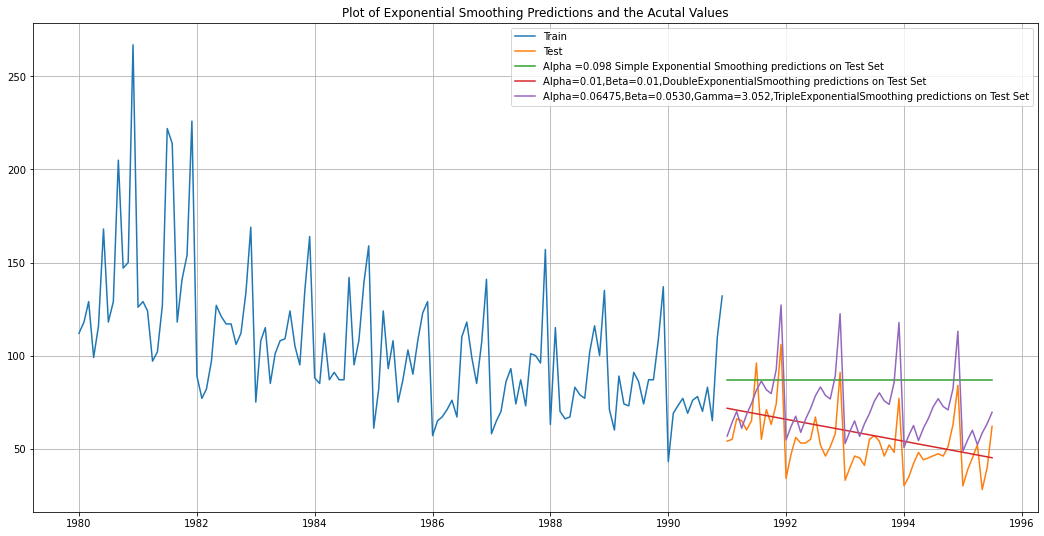

In [100]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose Monthly Sales'], label='Train')
plt.plot(test['Rose Monthly Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict_j'], label='Alpha=0.01,Beta=0.01,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

#### 5. Checking the Stationarity of the Data

In [101]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

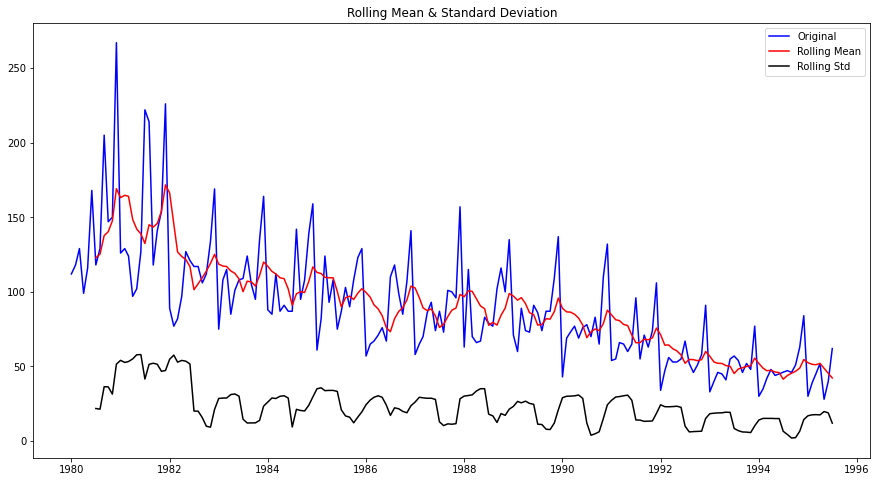

Results of Dickey-Fuller Test:
Test Statistic                  -1.880903
p-value                          0.341097
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [102]:
test_stationarity(dr2['Rose Monthly Sales'])

##### We see that at 5% significant level the Time Series is non-stationary.
##### Let us take a difference of order 1 and check whether the Time Series is stationary or not

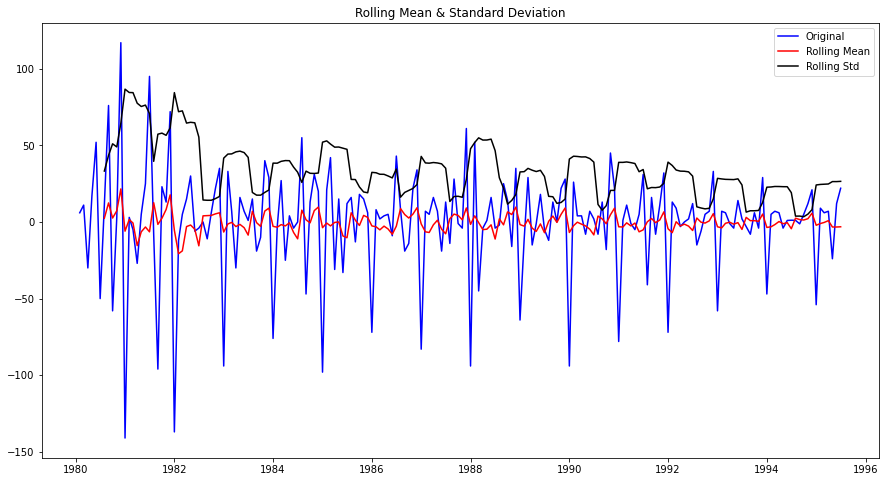

Results of Dickey-Fuller Test:
Test Statistic                -8.044819e+00
p-value                        1.806379e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [103]:
test_stationarity(dr2['Rose Monthly Sales'].diff().dropna())

#### 6.	 Build an automated version of the ARIMA/SARIMA model using the lowest AIC

#### ARIMA Model

In [104]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [105]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [106]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose Monthly Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464336
ARIMA(0, 1, 2) - AIC:1276.8353731090106
ARIMA(1, 1, 0) - AIC:1319.3483105801806
ARIMA(1, 1, 1) - AIC:1277.7757528008215
ARIMA(1, 1, 2) - AIC:1277.3592244971335
ARIMA(2, 1, 0) - AIC:1300.609261174594
ARIMA(2, 1, 1) - AIC:1279.0456894093093
ARIMA(2, 1, 2) - AIC:1279.2986939365428


In [107]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775753
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [108]:
auto_ARIMA = ARIMA(train['Rose Monthly Sales'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                              ARIMA Model Results                               
Dep. Variable:     D.Rose Monthly Sales   No. Observations:                  131
Model:                   ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                         css-mle   S.D. of innovations             30.167
Date:                  Sun, 15 Aug 2021   AIC                           1276.835
Time:                          13:34:04   BIC                           1288.336
Sample:                      02-01-1980   HQIC                          1281.509
                           - 12-01-1990                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose Monthly Sales    -0.7601      0.101     -7.499      0.

#### Predict on the Test Set using this model and evaluate the model.

In [109]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [110]:
from sklearn.metrics import  mean_squared_error
rmseARIMA = mean_squared_error(test['Rose Monthly Sales'],predicted_auto_ARIMA[0],squared=False)
print(rmseARIMA)

15.604562764824719


In [111]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmseARIMA]}
                           ,index=['AUTO_ARIMA(0,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"Alpha=0.01,Beta=0.01:DES",15.151827
"Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing",21.084366


#### SARIMA Model

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

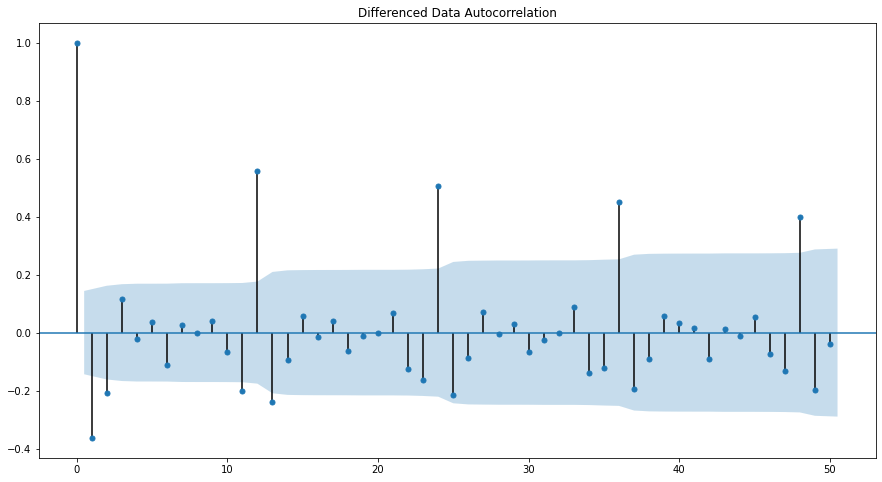

In [113]:
plot_acf(dr2['Rose Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### Setting the seasonality as 12 for the iteration of the auto SARIMA model.

In [114]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [115]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [116]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose Monthly Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207375
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380907
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869685958
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640048289


C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794541633464
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735409343577
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825916977
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049709354
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324695218
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433128578
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573482601331
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866186082
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430440255
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988259488389
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430829723
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697534894
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617377
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843916885
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933650412
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.831090619088
SARIMA(0, 1, 2)x(2, 0, 

In [117]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668848
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346498
70,"(2, 1, 1)","(2, 0, 1, 12)",897.639957


In [118]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose Monthly Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 15 Aug 2021   AIC                            887.938
Time:                                    13:34:54   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428    174.436     -0.005      0.996    -342.732     341.046
ma.L2         -0.1572     27.455   

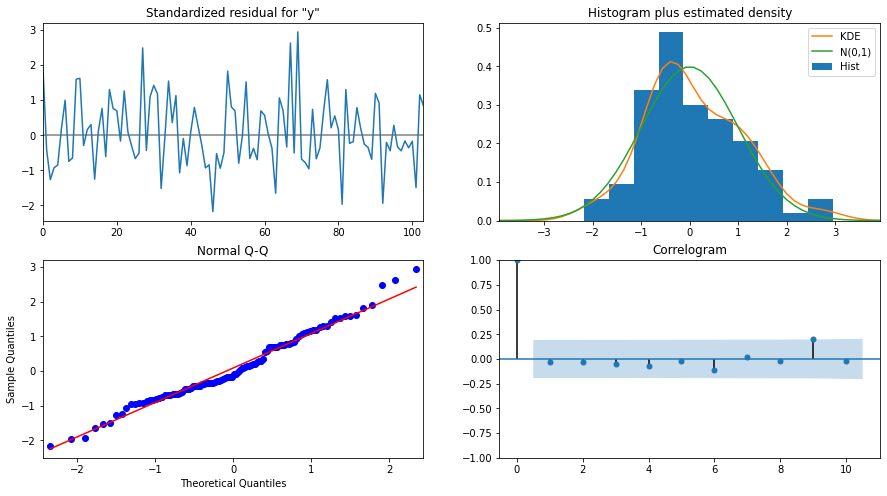

In [119]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

##### Predict on the Test Set using this model and evaluate the model.

In [120]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [121]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867710,15.928466,31.648491,94.086929
1,70.541191,16.147539,38.892596,102.189786
2,77.357273,16.147537,45.708683,109.005863
3,76.209639,16.147537,44.561049,107.858230
4,72.748088,16.147537,41.099498,104.396678


In [122]:
SARIMArmse = mean_squared_error(test['Rose Monthly Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(SARIMArmse)

26.881866954166934


In [123]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [SARIMArmse]}
                           ,index=['AUTO_SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"Alpha=0.01,Beta=0.01:DES",15.151827
"Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing",21.084366


#### 7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF 

#### ACF and PACF for ARIMA Model

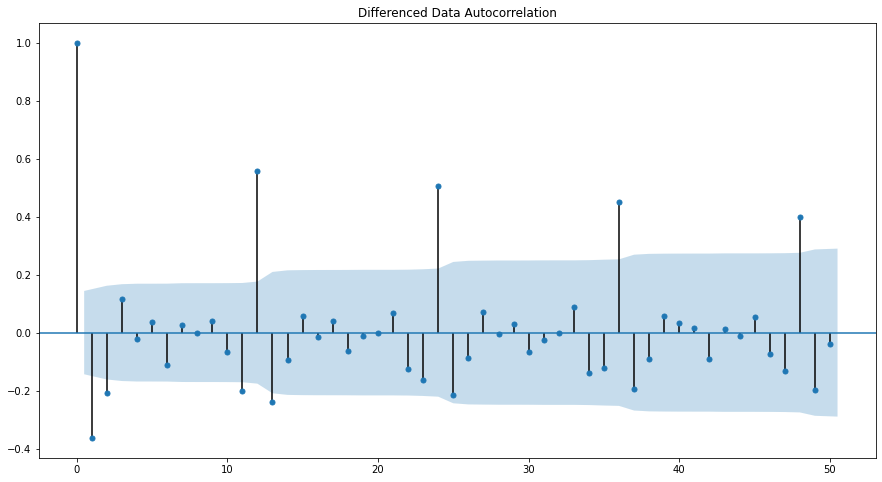

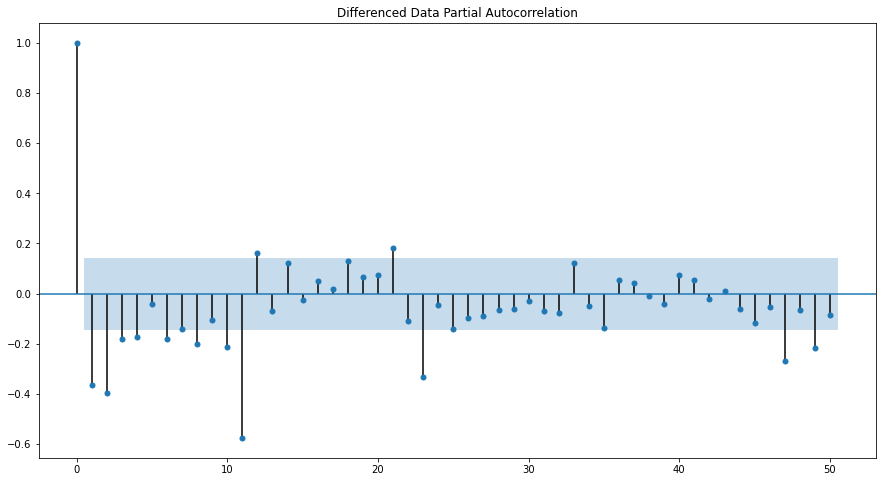

In [124]:
plot_acf(dr2['Rose Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(dr2['Rose Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [125]:
manual_ARIMA = ARIMA(train['Rose Monthly Sales'],order=(12,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                              ARIMA Model Results                               
Dep. Variable:     D.Rose Monthly Sales   No. Observations:                  131
Model:                  ARIMA(12, 1, 1)   Log Likelihood                -607.892
Method:                         css-mle   S.D. of innovations             24.297
Date:                  Sun, 15 Aug 2021   AIC                           1245.784
Time:                          13:36:15   BIC                           1288.912
Sample:                      02-01-1980   HQIC                          1263.309
                           - 12-01-1990                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5180      0.225     -2.298      0.022      -0.960      -0.076
ar.L1.D.Rose Monthly Sales     -1.8615      0.072    -26.021    

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


#### Predict on the Test Set using this model and evaluate the model.

In [126]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [127]:
ARIMArmse = mean_squared_error(test['Rose Monthly Sales'],predicted_manual_ARIMA[0],squared=False)
print(ARIMArmse)

13.70442290754629


In [128]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [ARIMArmse]}
                           ,index=['ARIMA_MANUAL(12,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"Alpha=0.01,Beta=0.01:DES",15.151827
"Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing",21.084366


#### ACF and PACF for SARIMA Model

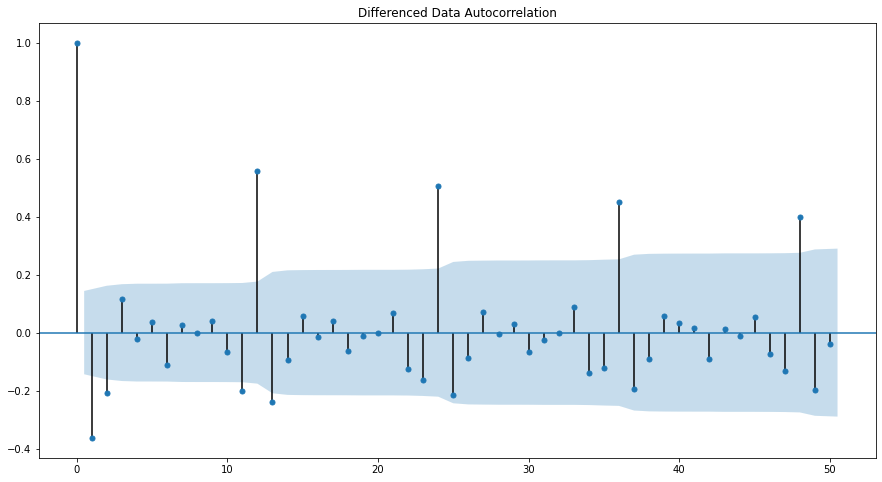

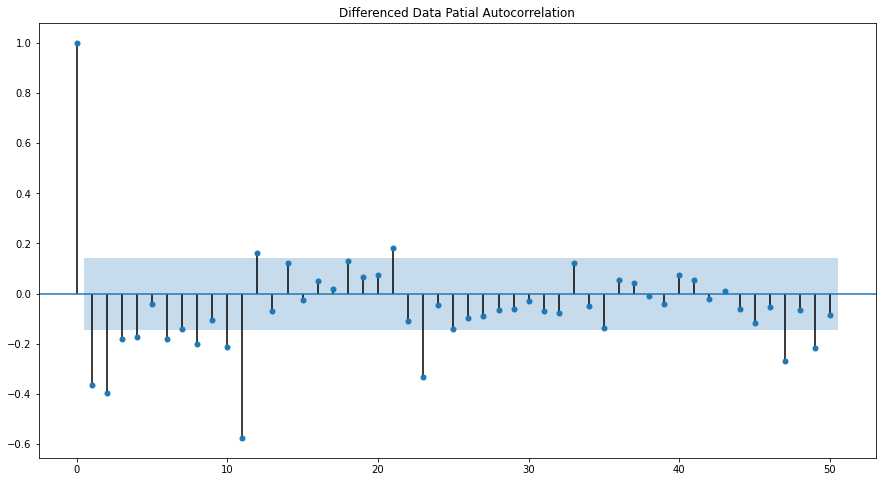

In [129]:
plot_acf(dr2['Rose Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(dr2['Rose Monthly Sales'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

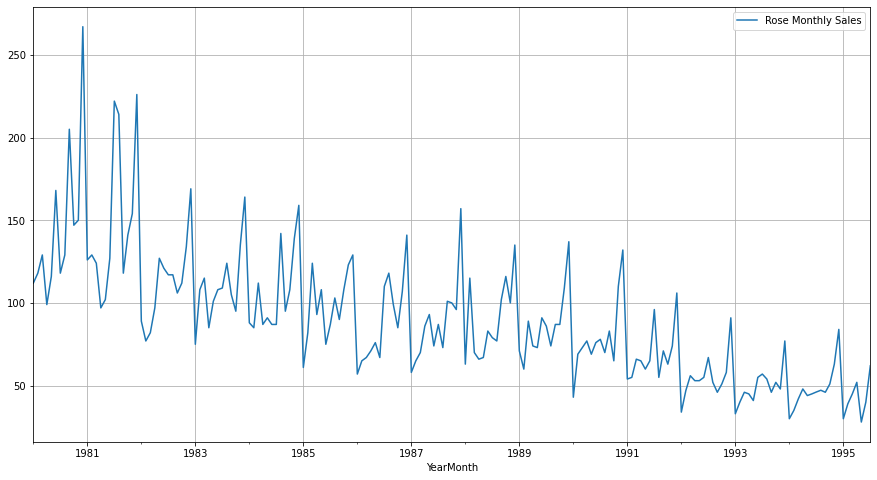

In [130]:
dr2.plot()
plt.grid();

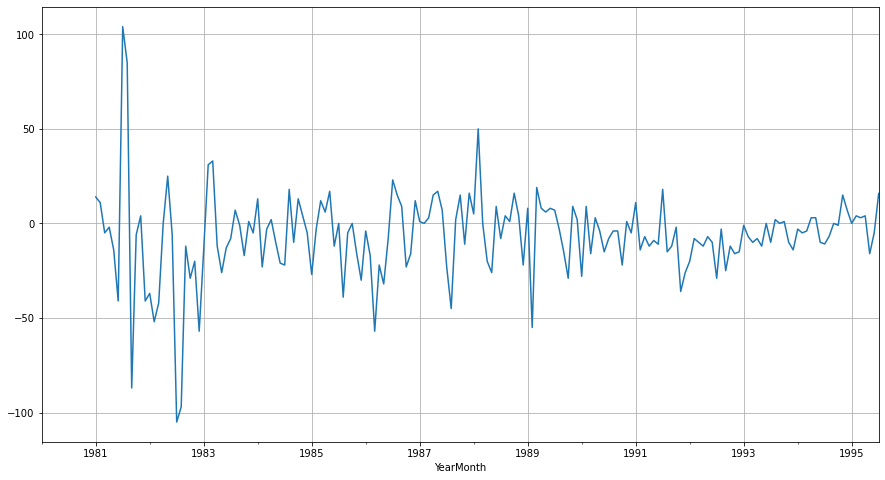

In [131]:
(dr2['Rose Monthly Sales'].diff(12)).plot()
plt.grid();

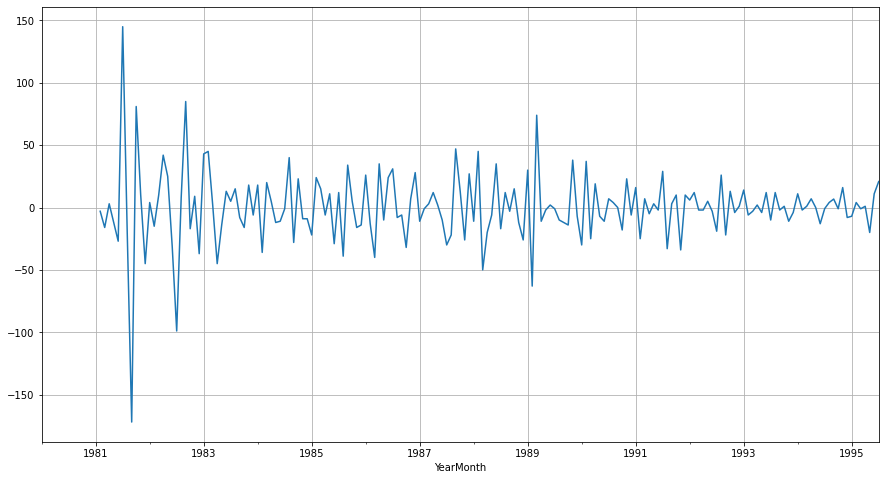

In [132]:
(dr2['Rose Monthly Sales'].diff(12)).diff().plot()
plt.grid();

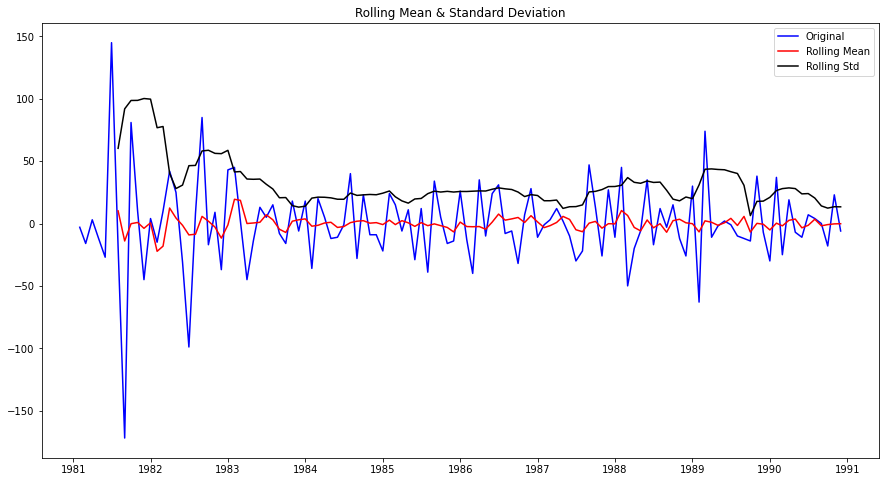

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [133]:
test_stationarity((train['Rose Monthly Sales'].diff(12).dropna()).diff(1).dropna())

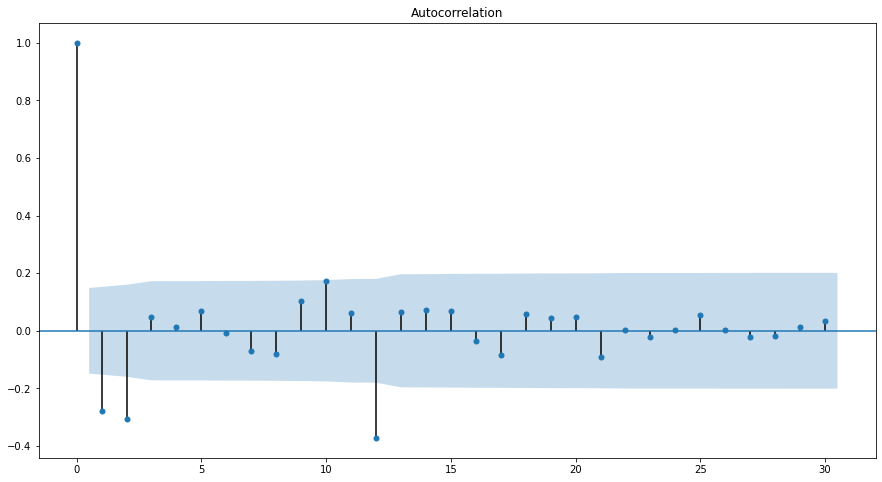

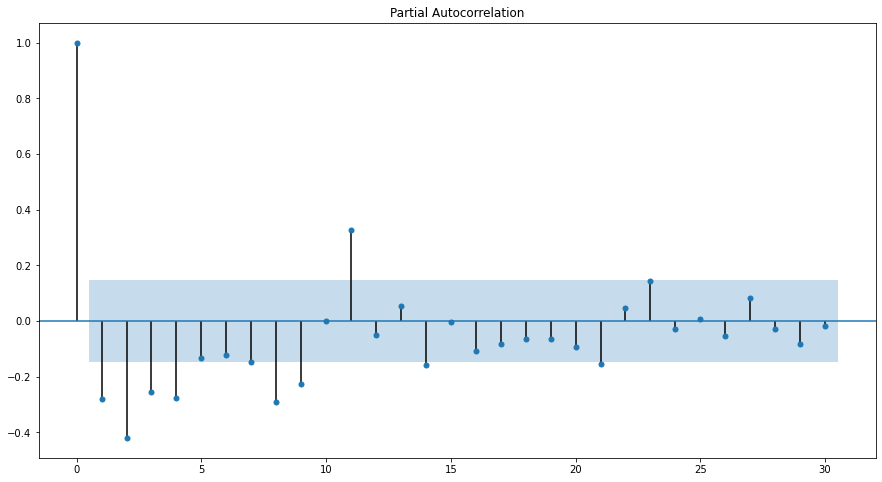

In [134]:
plot_acf((dr2['Rose Monthly Sales'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((dr2['Rose Monthly Sales'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [135]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose Monthly Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -458.646
Date:                            Sun, 15 Aug 2021   AIC                            927.292
Time:                                    13:36:22   BIC                            940.562
Sample:                                         0   HQIC                           932.669
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2139      0.117      1.829      0.067      -0.015       0.443
ma.L1         -0.9289      0.055   

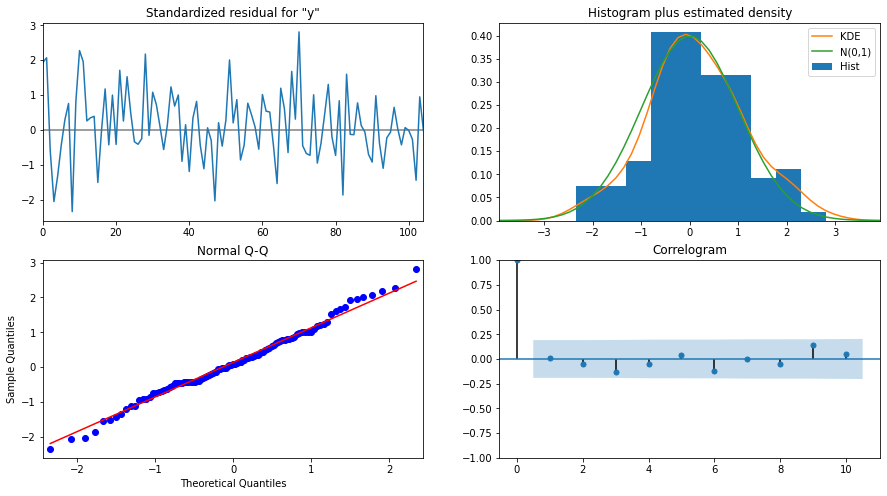

In [136]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model

In [137]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [138]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,48.573249,19.009685,11.314951,85.831547
1,59.070770,19.766678,20.328793,97.812747
2,73.308185,19.925481,34.254960,112.361410
3,69.566611,20.014800,30.338323,108.794898
4,64.394574,20.091662,25.015640,103.773508


In [139]:
rmseSARIMA = mean_squared_error(test['Rose Monthly Sales'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmseSARIMA)

17.169747094721618


In [140]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmseSARIMA]}
                           ,index=['SARIMA_MANUAL(1,1,1)(1,1,1,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
RegressionOnTime,15.255492
NaiveModel,79.672475
SimpleAverageModel,53.413298
2pointTrailingMovingAverage,11.529985
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.098,SimpleExponentialSmoothing",36.748404
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"Alpha=0.01,Beta=0.01:DES",15.151827
"Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing",21.084366


#### 8. Table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [151]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

,Test RMSE
2pointTrailingMovingAverage,11.529985
"ARIMA_MANUAL(12,1,1)",13.704423
4pointTrailingMovingAverage,14.444375
6pointTrailingMovingAverage,14.554986
"Alpha=0.01,Beta=0.01:DES",15.151827
RegressionOnTime,15.255492
"Alpha=1.49-08,Beta=4.70-10:DES",15.255502
"AUTO_ARIMA(0,1,2)",15.604563
"SARIMA_MANUAL(1,1,1)(1,1,1,12)",17.169747
"Alpha=0.06475,Beta=0.0530,Gamma=3.052,TripleExponentialSmoothing",21.084366


#### 9. Build the Most Optimum Model on the Complete Data and Predict 12 months into the Future.

In [142]:
Full_Data_Model = sm.tsa.statespace.SARIMAX(dr2['Rose Monthly Sales'],
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Results_Full_Data_Model = Full_Data_Model.fit(maxiter=1000)
print(Results_Full_Data_Model.summary())

C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\kirti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                 Rose Monthly Sales   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -674.868
Date:                            Sun, 15 Aug 2021   AIC                           1359.735
Time:                                    13:36:24   BIC                           1375.111
Sample:                                01-01-1980   HQIC                          1365.979
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1956      0.085      2.289      0.022       0.028       0.363
ma.L1         -0.9140      0.044   

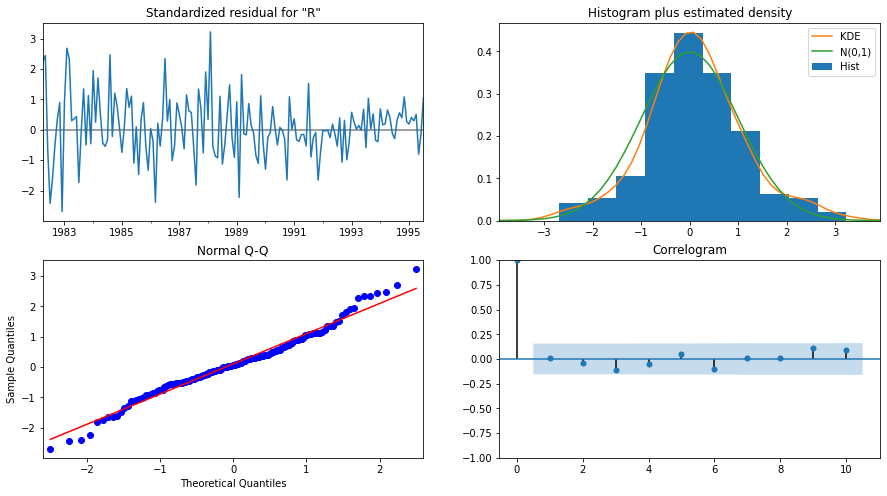

In [143]:
Results_Full_Data_Model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future.

In [144]:
Predicted_Manual_SARIMA_Full_Data = Results_Full_Data_Model.get_forecast(steps=12)

In [145]:
Predicted_Manual_SARIMA_Full_Data.summary_frame(alpha=0.05).head()

Rose Monthly Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.694527,16.390028,17.570663,81.818391
1995-09-01,43.490969,17.027122,10.118423,76.863514
1995-10-01,48.435632,17.183255,14.757071,82.114193
1995-11-01,53.996494,17.283713,20.121039,87.871948
1995-12-01,78.095085,17.374382,44.041921,112.148249


In [146]:
rmse = mean_squared_error(dr2['Rose Monthly Sales'],Results_Full_Data_Model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 31.76093386550302


In [147]:
Predict_Full_Data_Manual_Sarima = Predicted_Manual_SARIMA_Full_Data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

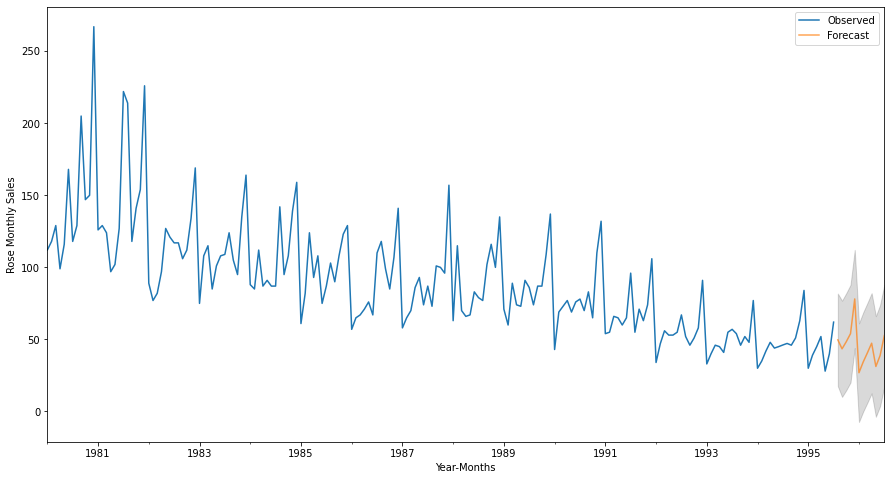

In [148]:
# plot the forecast along with the confidence band

axis = dr2['Rose Monthly Sales'].plot(label='Observed')
Predict_Full_Data_Manual_Sarima['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(Predict_Full_Data_Manual_Sarima.index, Predict_Full_Data_Manual_Sarima['mean_ci_lower'], 
                  Predict_Full_Data_Manual_Sarima['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Monthly Sales')
plt.legend(loc='best')
plt.show()